# Exploratory Data Analysis - Laptops Pricing dataset

- Visualize individual feature patterns
- Run descriptive statistical analysis on the dataset
- Use groups and pivot tables to find the effect of categorical variables on price
- Use Pearson Correlation to measure the interdependence between variables


## Set up

For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline


In [3]:
# Import the dataset

filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

df = pd.read_csv(filepath, header = 0)

df.head()

,Unnamed: 0,Unnamed: 0.1,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


##  Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


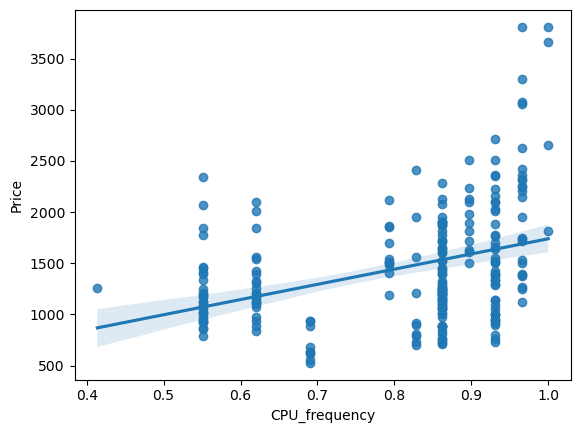

In [5]:
# CPU_frequency plot
sns.regplot(x='CPU_frequency', y = 'Price', data = df);

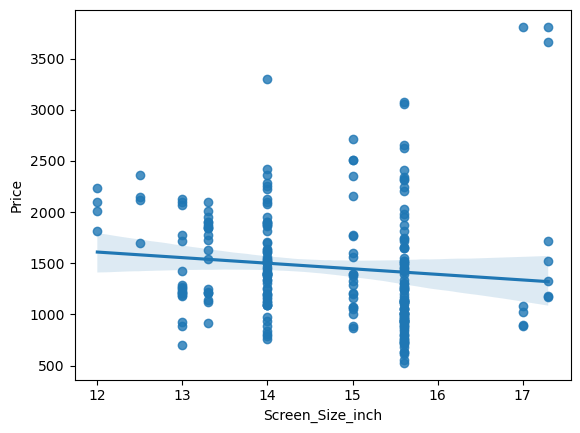

In [7]:
# Screen_Size_inch plot

sns.regplot(x='Screen_Size_inch', y='Price', data = df);

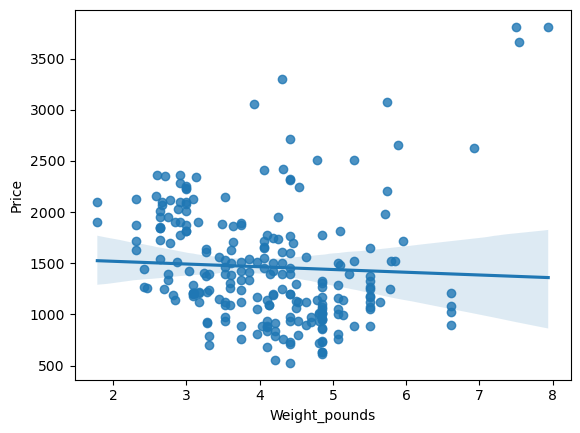

In [9]:
# Weight_pounds plot

sns.regplot(x='Weight_pounds', y='Price', data=df);
    

In [11]:
for param in ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']:
    print(f"Correlation of Price and {param} is ", df[[param, "Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<Axes: xlabel='Category', ylabel='Price'>

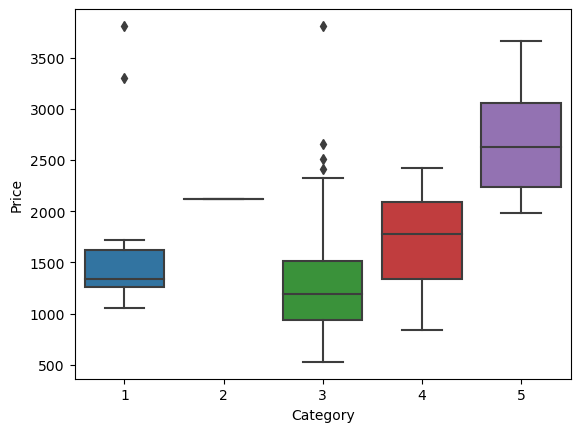

In [12]:
# Category Box plot

sns.boxplot(x='Category', y='Price', data = df)

<Axes: xlabel='GPU', ylabel='Price'>

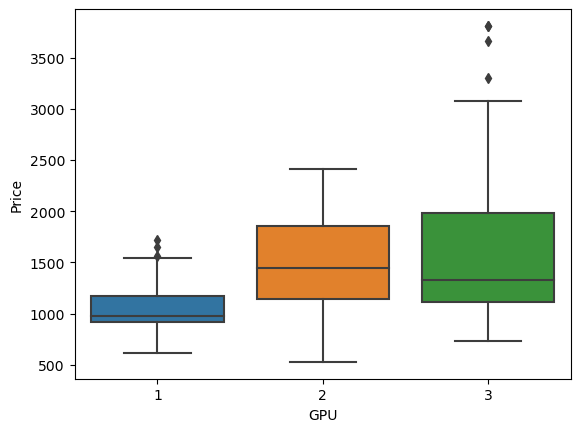

In [13]:
# GPU Box plot

sns.boxplot(x='GPU', y='Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

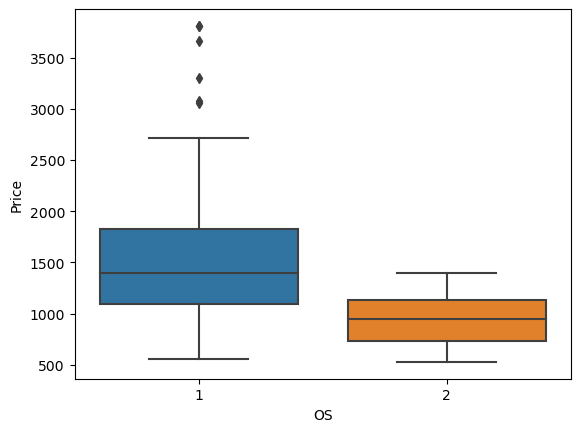

In [14]:
# OS Box plot

sns.boxplot(x='OS', y='Price', data = df)

<Axes: xlabel='CPU_core', ylabel='Price'>

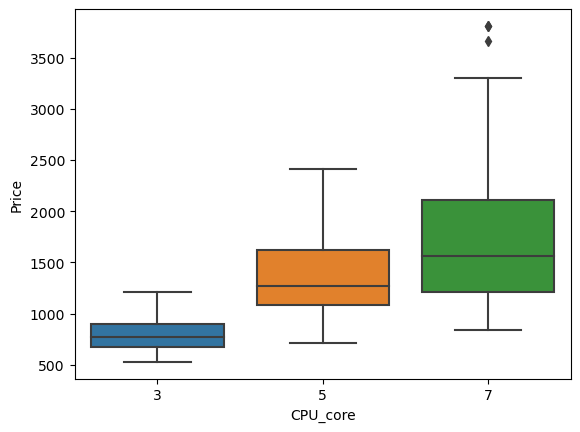

In [15]:
# CPU_core Box plot

sns.boxplot(x='CPU_core', y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

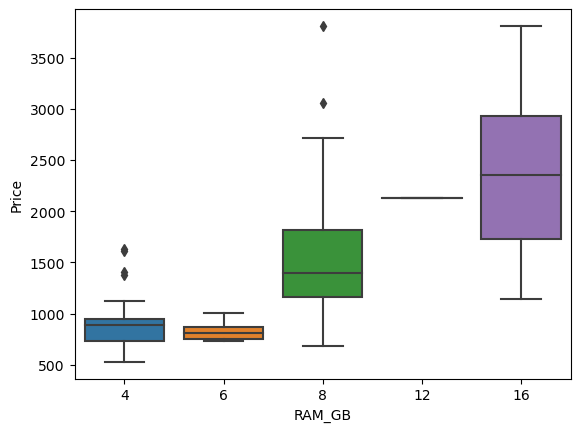

In [16]:
# RAM_GB Box plot

sns.boxplot(x='RAM_GB', y='Price', data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

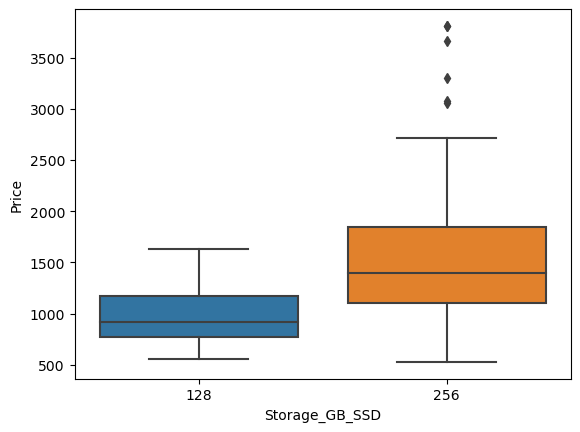

In [19]:
# Storage_GB_SSD Box plot

sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

## Descriptive Statistical Analysis
Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [22]:
df.describe(include='object')

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


In [23]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


## GroupBy and Pivot Tables
Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.



In [26]:
gr = df[["GPU", "CPU_core","Price"]]
gr= gr.groupby(["GPU", "CPU_core"], as_index = False).mean()
gr

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [29]:
gr_pivot = gr.pivot(index='GPU', columns = 'CPU_core')

gr_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

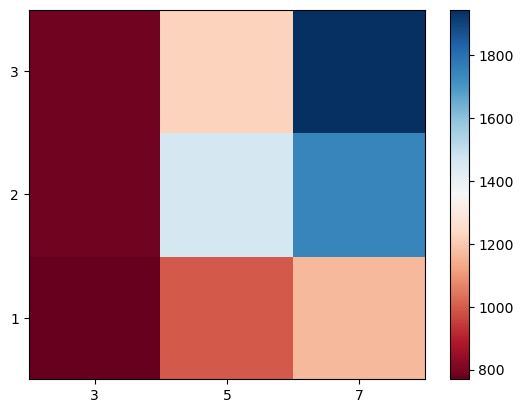

In [33]:
fig, ax = plt.subplots()
im = ax.pcolor(gr_pivot, cmap="RdBu")

#labels name
row_labels = gr_pivot.columns.levels[1]
column_labels = gr_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(gr_pivot.shape[1])+0.5, minor = False)
ax.set_yticks(np.arange(gr_pivot.shape[0]) + 0.5, minor = False)

#insert labels
ax.set_xticklabels (row_labels, minor = False)
ax.set_yticklabels (column_labels, minor = False)

fig.colorbar(im)


## Pearson Correlation and p-values

In [35]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param],df['Price'])
    print(param)
    print("The Pearson Correlation Coefficent for ", param, " is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficent for  RAM_GB  is 0.5492972971857846  with a P-value of P = 3.68156062884271e-20
CPU_frequency
The Pearson Correlation Coefficent for  CPU_frequency  is 0.36666555892588626  with a P-value of P = 5.5024633507132934e-09
Storage_GB_SSD
The Pearson Correlation Coefficent for  Storage_GB_SSD  is 0.24342075521810302  with a P-value of P = 0.00014898923191724217
Screen_Size_inch
The Pearson Correlation Coefficent for  Screen_Size_inch  is -0.11064420817118291  with a P-value of P = 0.08853397846830661
Weight_pounds
The Pearson Correlation Coefficent for  Weight_pounds  is -0.05031225837751544  with a P-value of P = 0.4397693853433894
CPU_core
The Pearson Correlation Coefficent for  CPU_core  is 0.4593977773355116  with a P-value of P = 7.912950127009033e-14
OS
The Pearson Correlation Coefficent for  OS  is -0.2217298011482737  with a P-value of P = 0.0005696642559246747
GPU
The Pearson Correlation Coefficent for  GPU  is 0.28829819888814257  with a P-v